# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Data

In [4]:
data = pd.read_csv('Articles.csv', encoding = "ISO-8859-1")

In [5]:
data.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


# EDA

In [6]:
with open('stopwords.txt') as f:
    stopwords_ = f.readlines()

In [7]:
stopwords = (set(map(lambda x: x.strip(), stopwords_))-set(['neither', 'no', 'not', 'nor', 'none', 'never']))|set(['.'])

In [8]:
print(sorted(stopwords))

['.', 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'ain', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'aren', "aren't", 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldn', "couldn't", 'couldnt', 'cry', 'd', 'de', 'describe', 'detail', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify'

In [9]:
def remove_stop_words(X):
    features = []
    for x in X.split():
        if x.lower() not in stopwords:
            features.append(x.lower())
    return ' '.join(features)

In [10]:
text = data['Article']

In [11]:
text = text.apply(lambda x : re.sub(r'\W', ' ', str(x)))
text = text.apply(lambda x : re.sub(r'\d', ' ', str(x)))
text = text.apply(lambda x : re.sub(r'\.', ' . ', str(x)))
text = text.apply(lambda x : re.sub(r'\s+', ' ', str(x)))
text = text.apply(lambda x : x.strip())
text = text.apply(remove_stop_words)

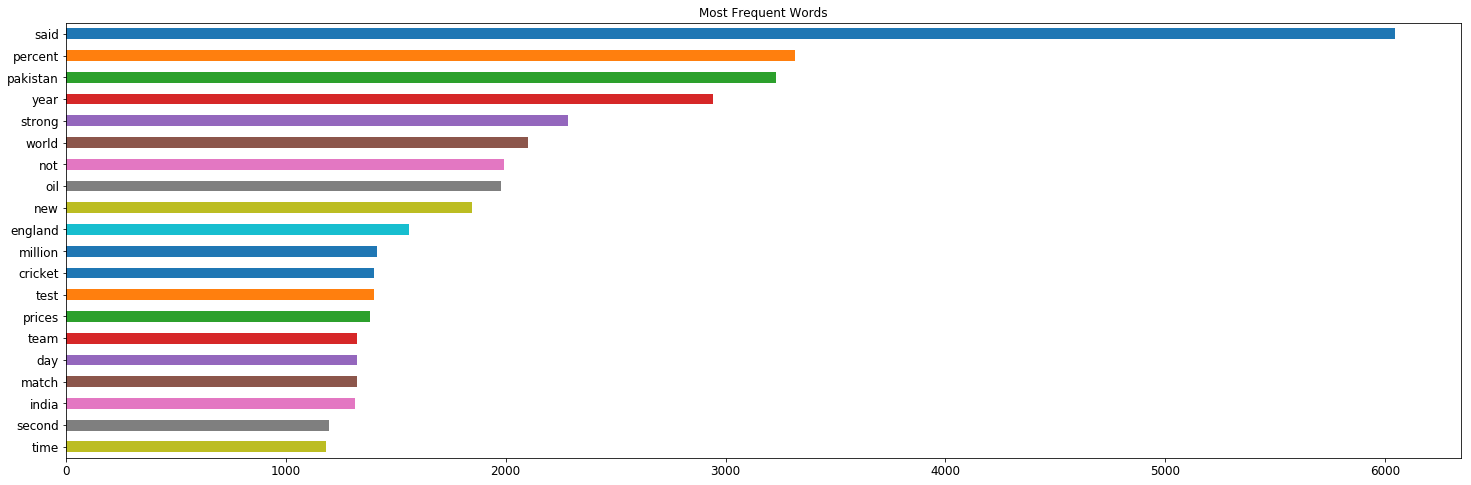

In [12]:
fig, ax = plt.subplots(figsize=(25,8))
pd.Series(' '.join(text).split()).value_counts()[:20].plot.barh(ax = ax, fontsize=12)
ax.set_title(f'Most Frequent Words')
fig.gca().invert_yaxis()

# Vectorization

In [13]:
vectorizer = TfidfVectorizer()
vectorizer.fit(text)
vectors = vectorizer.transform(text)

# Clustering

## K Means

In [14]:
from sklearn.cluster import KMeans

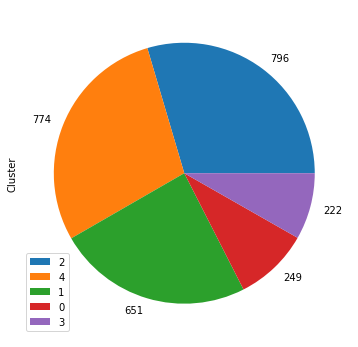

In [36]:
n = 5
model = KMeans(n_clusters=n)
model.fit(vectors)
print('Clustering Done !!!')
y_pred = pd.Series(model.predict(vectors), name='Cluster')
vals = y_pred.value_counts()
vals.plot.pie(figsize=(6, 6), labels=vals)
plt.legend(vals.index)

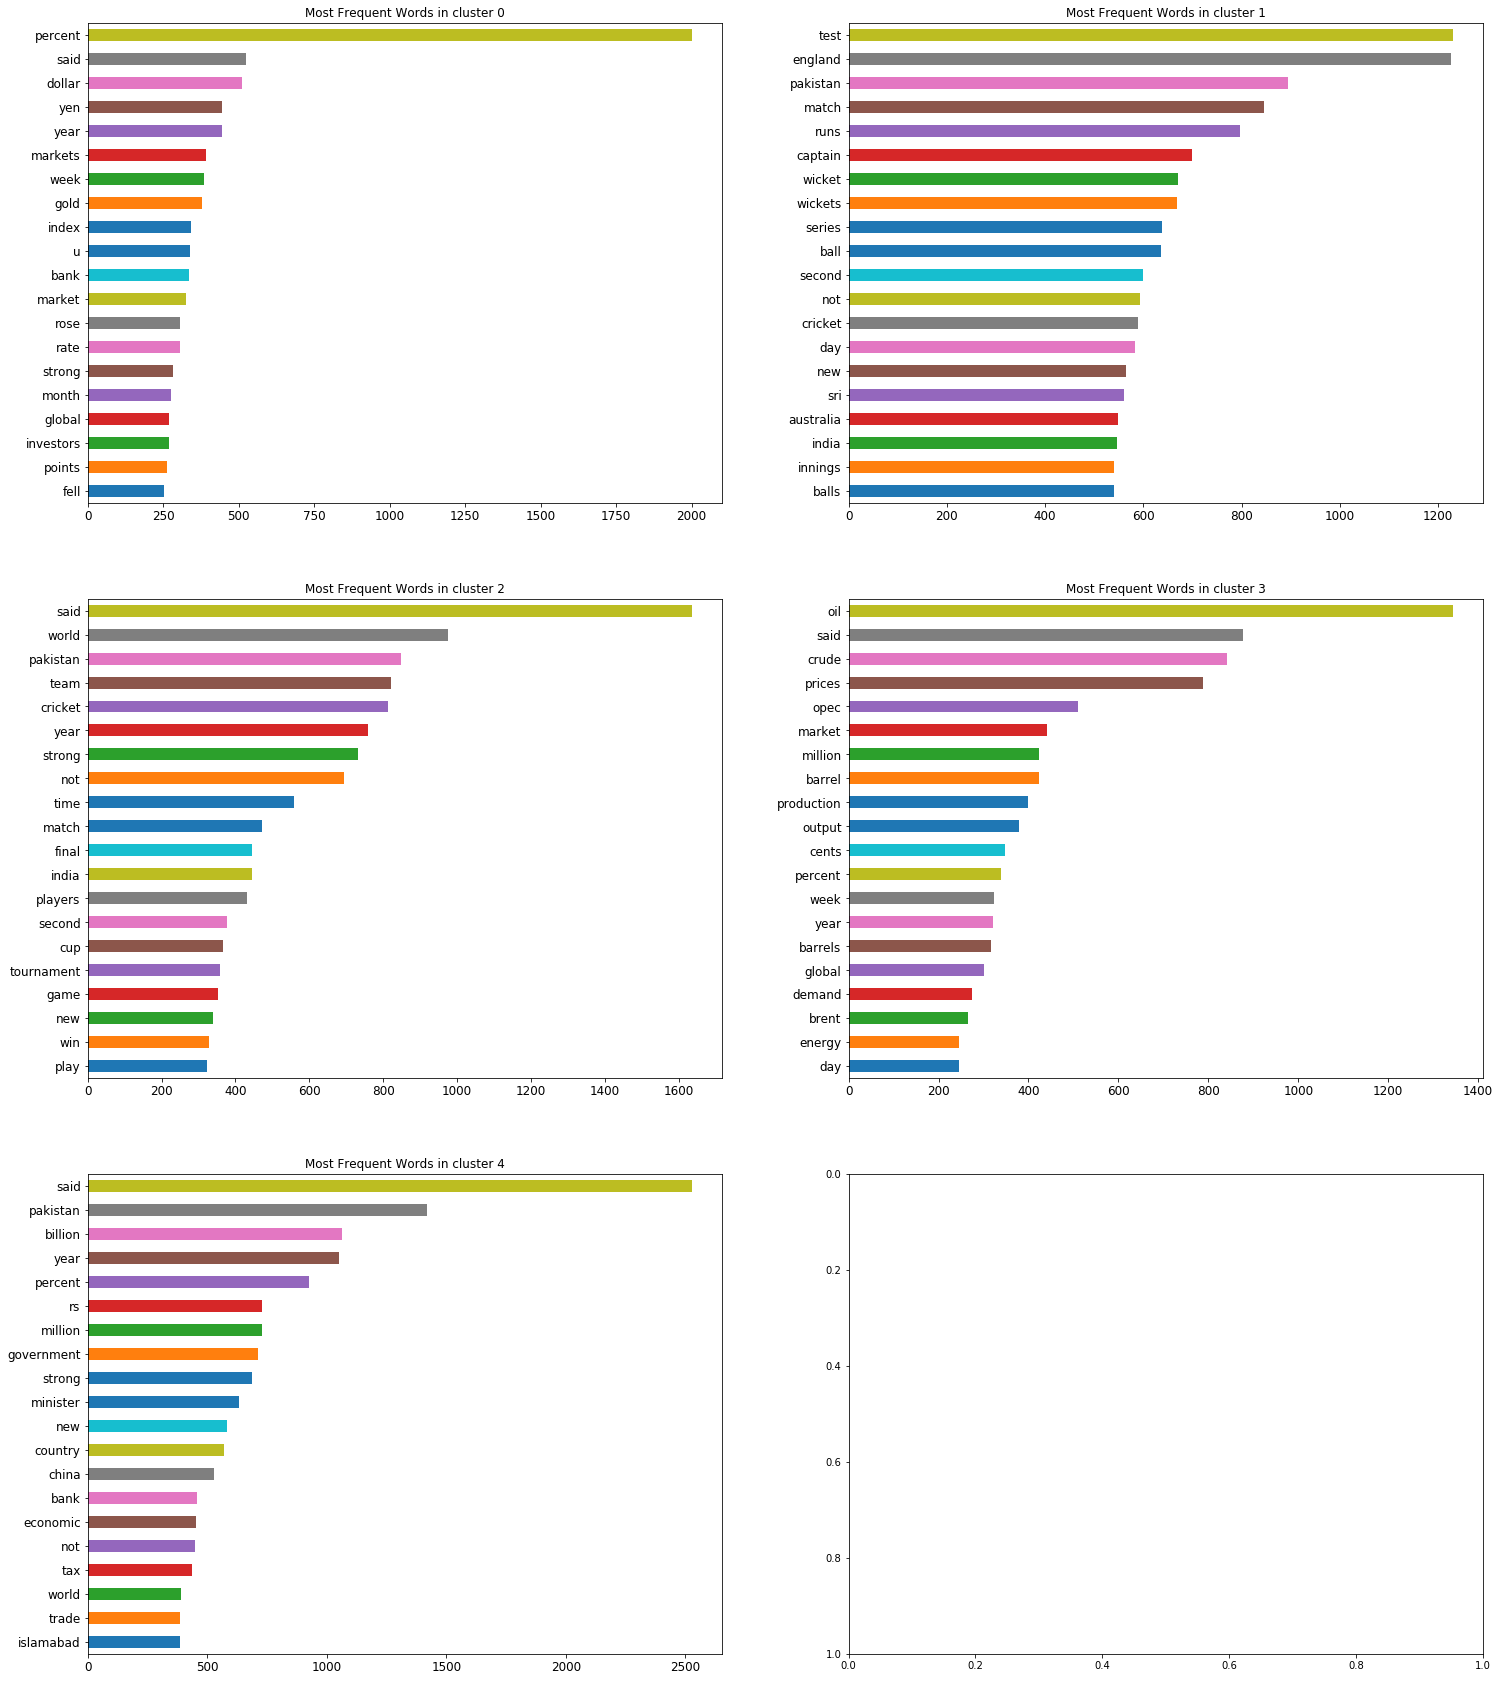

In [70]:
from math import ceil
n = 5
figsize = (25, 10*ceil(n/2))
fig, ax = plt.subplots(figsize=figsize, ncols=2, nrows=ceil(n/2))
for i in range(n):
    pd.Series(' '.join(text[y_pred == i]).split()).value_counts()[::-1].tail(20).plot.barh(ax = ax[i//2][i%2], fontsize=12)
    ax[i//2][i%2].set_title(f'Most Frequent Words in cluster {i}')
fig.gca().invert_yaxis()

In [ ]:
## 